<a href="https://colab.research.google.com/github/st20080675/OCR-collection/blob/main/OCR_with_easyocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# read street signs in different language in the wild with easyocr

In [7]:
!pip install easyocr

# helper function to read online image via url

In [8]:
import urllib.request as urllib
import numpy as np
import matplotlib.pyplot as plt
import cv2


def image_url_to_numpy_array_urllib(url,format=None):
    ## read as HTTPResponse
    resp = urllib.urlopen(url)
    ## read as 1D bytearray
    resp_byte_array = resp.read()
    ## returns a bytearray object which is a mutable sequence of integers in the range 0 <=x< 256
    mutable_byte_array = bytearray(resp_byte_array)
    ## read as unsigned integer 1D numpy array
    image = np.asarray(mutable_byte_array, dtype="uint8")
    ## To decode the 1D image array into a 2D format with RGB color components we make a call to cv2.imdecode
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    if format=='BGR' :
        ## return BGR format array
        return image
    ## cv2.imdecode converted array into BGR format , convert it to RGB format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # return the image
    return image

# img =image_url_to_numpy_array_urllib(url=url,format='BGR')
# plt.imshow(img)

The next step after installing the library is to load the model using the **Reader** class that takes in parameter a list of languages we want the model to take into consideration, which correspond most of the time of the languages required by our use case. Each language is represented by a code name; for instance:
- fr for french  
- en for english
- cs for Czech
- etc.
The whole list is available from [here](https://www.jaided.ai/easyocr/)


Loading the model could take a bit longer, but it is a one time process, because multiple running is not required. In case you don't have any GPU, or if you are dealing with a low memory GPU, you can simply use your CPU after deactivating your GPU by setting the gpu=False in the Reader class.  

Disclaimer: even if it is possible to provide a list of languages, it is important to know that not all languages are compatible (can not be read together)

#### Output of the Reader.   
The default output is a list of tuples, and each tuple is in this format.
- ([bounding box cordinates], *the actual text detected*, the confidence level of detection)

If you want only the text format, you can set the detail=0 in the readtext function like this: **reader.readtext(my_image, detail = 0)**

In [4]:
# Import the library
import easyocr
from IPython.display import Image
import requests

# Load the model
reader_en_fr = easyocr.Reader(['en', 'fr'])

# Since chinese is not compatible with French, is it creating as a standalone model
reader_ch = easyocr.Reader(['ch_sim'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

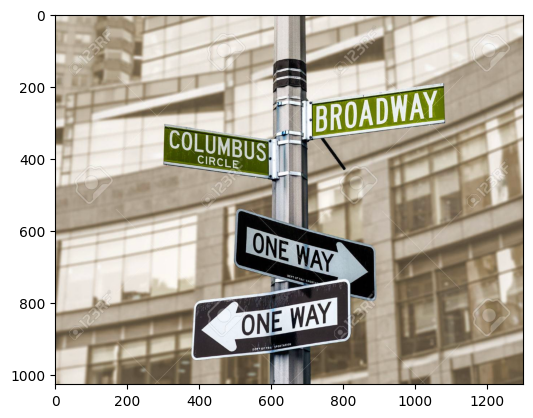

In [9]:
url_fr = 'https://i.pinimg.com/564x/46/d4/19/46d419f12a81e46df9765c6a8345521b.jpg'
img_fr = image_url_to_numpy_array_urllib(url=url_fr,format='BGR')
plt.imshow(img_fr)


url_ch = 'https://i.pinimg.com/474x/44/52/8c/44528c3610dea076f0d1ad4066441dc7.jpg'
img_ch = image_url_to_numpy_array_urllib(url=url_ch, format='BGR')
plt.imshow(img_ch)

url_en = 'https://previews.123rf.com/images/palinchak/palinchak1612/palinchak161200228/67936367-new-york-usa-may-01-2016-street-signs-for-broadway-and-columbus-circle-manhattan-nyc.jpg'
img_en = image_url_to_numpy_array_urllib(url=url_en, format='BGR')
plt.imshow(img_en)

In [10]:
text = reader_en_fr.readtext(img_fr, detail = 0, paragraph=False)
print(text)

text = reader_en_fr.readtext(img_en, detail = 0, paragraph=False)
print(text)

text = reader_ch.readtext(img_ch, detail = 0, paragraph=False)
print(text)

['Mairie du F[4', 'du', 'LES ARTS DÉCORATIFS', '[Musée du LOUVRE', 'du PALAIS-RoYALt', '[Palais', 'LOUVRE', 'Théâtre']
['0E', 'DEpy', '0', "@I23rf'", 'BROADWAY', 'COLUMBUS ', 'CIRCLE', '0i2s)', '01231', 'ONE', 'WAY', 'Pe', '0e7al', '0', 'WAY', 'Geosfaton', '07 7a /']
[" ''", '15', '~烹圣爱医跷', '兆烹艾丽斯妇秤医1', '地世:', '($8岳', '北京:', '康医', '<蟊#魉囤', '匦亓纛圆顸区', '画郊寞阖', '潞']
